In [22]:
import requests
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [23]:
def convert_volume(s):
    s = float(s.replace(',',''))
    return s*10

In [24]:
# Lấy data từ web
def get_data(link):
    html = requests.get(link)
    soup = bs4.BeautifulSoup(html.text, 'lxml')
    price = [float(i.text) for i in soup.find_all('td', class_="Item_DateItem", rel="price")]
    volume = [i.text for i in soup.find_all('td', class_="Item_Price10", rel="volume")]
    volume = list(map(convert_volume, volume))
    d = {'Price': price, 'Volume': volume}
    df = pd.DataFrame(d)
    return df

In [25]:
# Đầu vào <10 sẽ thêm số 0 vào trước. VD: input = 1 => output = 01
def convert_date_and_month(i):
    if (i < 10):
        out = '0'+str(i)
    else:
        out = i
    return out

In [26]:
def volume_depth(stock_code, start_date, end_date):
    start_list = start_date.split('/')
    end_list = end_date.split('/')
    start_list = list(map(int, start_list))
    end_list = list(map(int, end_list))
    
    start_date = datetime.date(day=start_list[0], month=start_list[1], year=start_list[2])
    end_date = datetime.date(day=end_list[0], month=end_list[1], year=end_list[2])
    
    df = pd.DataFrame(columns=['Price','Volume'])
    
    for i in range((end_date - start_date).days):
        #print(f'Processing on {start_date.day}/{start_date.month}/{start_date.year}')
        y = get_data(f'https://s.cafef.vn/Lich-su-giao-dich-{stock_code}-6.chn?date={convert_date_and_month(start_date.day)}/{convert_date_and_month(start_date.month)}/{start_date.year}')
        start_date += datetime.timedelta(days=1)
        df = pd.concat([df,y])   
    
    print('Finish')
    output = df.groupby('Price').sum()
    
    return output

In [27]:
df = volume_depth('NVL', '22/12/2022', '5/2/2023')

Finish


Text(0, 0.5, 'Volume')

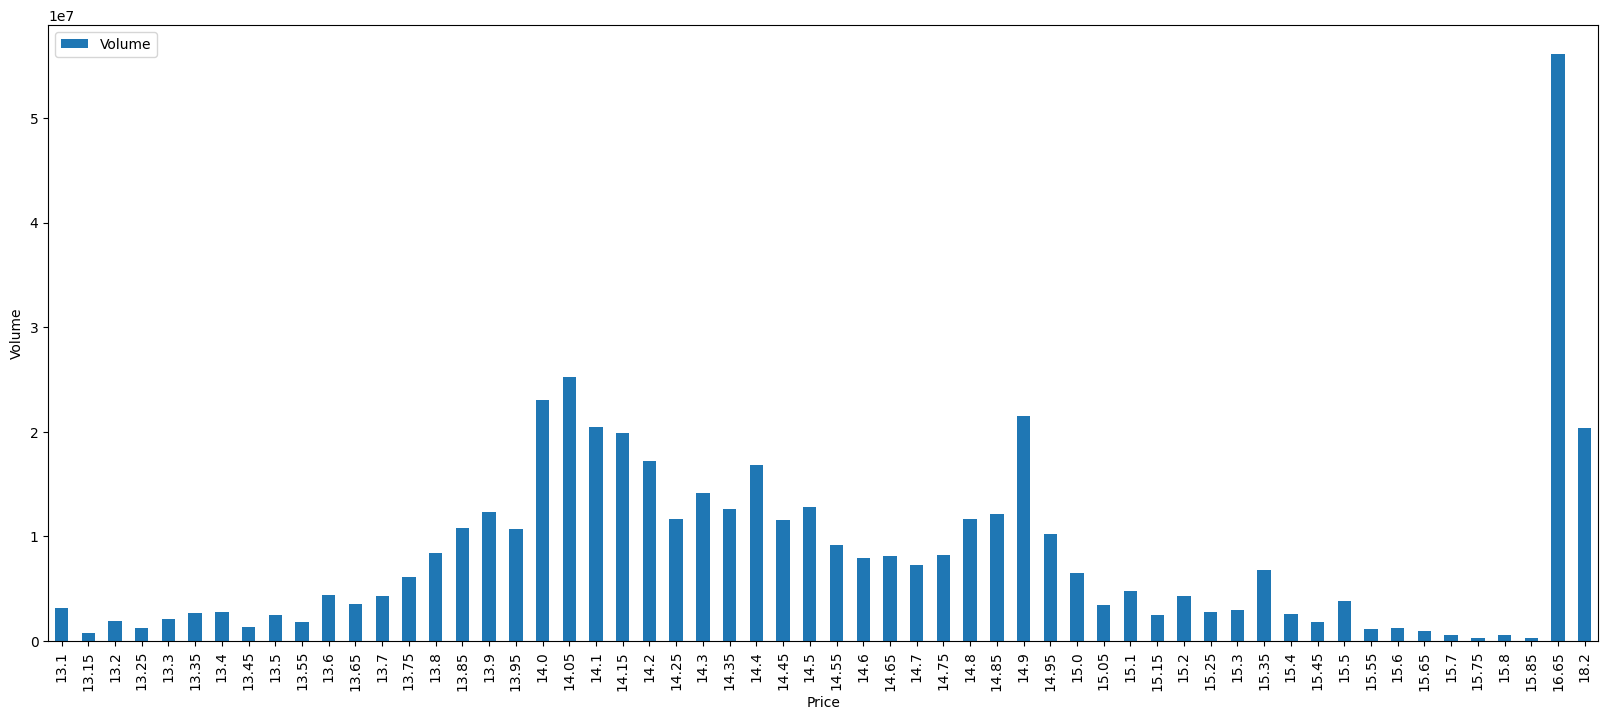

In [28]:
df.plot(kind='bar', figsize=(20,8))
plt.xlabel('Price')
plt.ylabel('Volume')